# Data Wrangling for WeRate Dogs Twitter

In [1]:
# Importing necessary librabries
import os
import requests as rq
import pandas as pd
from timeit import default_timer as timer
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import datetime as dt

### Table of contents
<ul>
<li><a href="#Gathering data">1. Gathering data</a></li>
    <ul>
    <li><a href="#WeRateDogs Twitter archive">1.1 WeRateDogs Twitter archive (csv file provided)</a></li>
     <li><a href="#Twitter image predictions">1.2 Twitter image predictions (tsv file via URL)</a></li>
     <li><a href="#Additional info from Twitter API">1.3 Additional info from Twitter API (txt file via tweepy)</a></li>
      </ul> 
<li><a href="#Assessing data">2. Assesing data</a></li> 
    <ul>
    <li><a href="#Visual assessment">2.1 Visual Assessment</a></li>
     <li><a href="#Programatic assessment">2.2 Programatic Assessment</a></li>
     <li><a href="#Quality issues">2.3 Quality issues</a></li>
        <li><a href="#Tidiness issues">2.4 Tidiness issues</a></li>
      </ul> 
<li><a href="#Cleaning data">3. Cleaning data</a></li>
<li><a href="#Storing data">4. Storing data</a></li>
<li><a href="#Analysing and visualising data">5. Analysing and visualising data data</a></li>
</ul> 
 

<a id='Gathering data'></a>
## 1. Gathering data

<a id='WeRateDogs Twitter archive'></a>
### 1.1 WeRateDogs Twitter archive 
The csv file was provided by Udacity and I downloaded it manually to my local workspace.

In [2]:
# Reading csv file to Pandas DataFrame
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721...,11,10,None,None,None,None,None
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chelsea. She forgot how to dog. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None


In [4]:
archive.shape

(2356, 17)

<a id='Tweet image predictions'></a>
### 1.2 Tweet image predictions
The tsv file was provided on url below. I have downloaded it using requests library.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = rq.get(url)

In [7]:
# verifying if the request was succesful. 
# source: https://realpython.com/python-requests/ where response 200 is stated as succesful request
response

<Response [200]>

In [8]:
response.encoding

'utf-8'

In [9]:
# save url content to file
with open ("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [10]:
# reading tsv file therefore separator set for tabulator ('\t')
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [11]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
images.shape

(2075, 12)

<a id='Additional info from Twitter API'></a>
### 1.3 Additional info from Twitter API
In order to access data about number of retweets and likes of the tweets I had to create Twitter Developper account and download data using Twitter API.

In [13]:
# accessing Tweepy with individual API keys and tokens from my Twitter Developper acount

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# source https://knowledge.udacity.com/questions/123023 for adding parser to tweepy.API
# wait_on_rate_limit for automatically wait for rate limits to replenish
# wait_on_rate_limit_notify – print a notification when Tweepy is waiting for rate limits to replenish

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [14]:
# returns a single status specified by the ID parameter as an object
tweet = api.get_status(892420643555336193, tweet_mode='extended')
# checking the result
print(tweet)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [15]:
tweet_ids = archive['tweet_id'].to_list()

In [16]:
# I used modified code from provided file by Udacity twitter_api.py
count = 0
tweets_found = []
tweets_not_found = []

start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', mode = 'w') as in_file:
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            json.dump(tweet, in_file)
            in_file.write('\n') # new tweet is on new line
            tweets_found.append(tweet_id)
        
        except Exception as e:
            tweets_not_found.append(tweet_id)
        
 # for displaying progress only after 100 tweets were processed       
        if count % 100 == 0:
            print(str(count) + ' tweets processed')
            
end = timer()
print(end - start)

100 tweets processed
200 tweets processed
300 tweets processed
400 tweets processed
500 tweets processed
600 tweets processed
700 tweets processed
800 tweets processed


Rate limit reached. Sleeping for: 495


900 tweets processed
1000 tweets processed
1100 tweets processed
1200 tweets processed
1300 tweets processed
1400 tweets processed
1500 tweets processed
1600 tweets processed
1700 tweets processed


Rate limit reached. Sleeping for: 509


1800 tweets processed
1900 tweets processed
2000 tweets processed
2100 tweets processed
2200 tweets processed
2300 tweets processed
2060.7194706


In [17]:
# check how many tweets were not found
len(tweets_not_found)

25

In [18]:
len(tweets_found)

2331

In [19]:
# alternative of reading json file with Pandas
df_json = pd.read_json('tweet_json.txt', lines=True)

In [20]:
df_json.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
795,2016-08-31 00:58:39+00:00,770787852854652928,770787852854652928,This is Winston. His tongue has gone rogue. Do...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 770787842972942337, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2276,2015-11-18 18:17:59+00:00,667044094246576128,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667044086843637761, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1385,2016-02-15 02:38:53+00:00,699060279947165696,699060279947165696,This is Yukon. He pukes rainbows. 12/10 magica...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [21]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [22]:
# reading json file with json.loads because we are transforming json object to a string
df_list = []

with open ('tweet_json.txt', mode = 'r') as r_file:
    for line in r_file.readlines():
        data = json.loads(line)
        df_list.append({'tweet_ids': data['id'],
                       'num_of_retweets': data['retweet_count'],
                       'num_of_likes': data['favorite_count'],
                       })


twitter_api_data = pd.DataFrame(df_list, columns=['tweet_ids', 'num_of_retweets', 'num_of_likes'])
twitter_api_data.head(5)

,tweet_ids,num_of_retweets,num_of_likes
0,892420643555336193,7733,36349
1,892177421306343426,5727,31320
2,891815181378084864,3788,23592
3,891689557279858688,7901,39654
4,891327558926688256,8519,37849


In [23]:
twitter_api_data.shape

(2331, 3)

<a id='Assessing data'></a>
## 2. Assesing data

Each issue is mentioned twice. Firstly when I observe it while assessing data, later in summary of all quality and tidiness issues. Links included in summary enable reader directly jump to cleaning phase for selected issue.

<a id='Visual assessment'></a>
### 2.1 Visual assessment

In [24]:
# for visual asssessment I have randomly checked samples of 10 rows multiple times for each dataset. I could have also printed here whole datasets, but that would just make ipynb too long and little bit unorganized
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,None,None,pupper,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,None,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,None,None,None
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None


- to get rating as one single number for easy comparision rating_numerator needs to be divided by rating rating_denominator
- dog stages from 4 columns (doggo, floofer, pupper, puppo) should be stored as one variable in one column
- value None in name column is just other expression of NaN
- the text of tweet is not visible. Probably people looking on this dataset will be interested to see whole text
- we could extract some more information from text of tweet. I would be interested to know in which tweets words related to 'puppy' appear, so we can test if tweets with puppies has better ratings, more likes etc.

In [25]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,0.305850,True,Tibetan_mastiff,0.063325,True
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_Flandres,0.004693,True
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
1861,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.685084,True,Cardigan,0.314608,True,basenji,0.000160,True
1196,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False


- 3 different predictions of dog breeds for each image do not make much sense, because there are very rarely more dogs of different breeds on picture. We should keep only one predicted value, either dog breed with highest prediction, or information that no dog was predicted by neural network
- first letter of dog breed is sometimes lowercase, sometimes uppercase

In [26]:
twitter_api_data.sample(10)

,tweet_ids,num_of_retweets,num_of_likes
1784,676864501615042560,699,2078
1182,715758151270801409,1433,3715
317,832998151111966721,2218,13373
1756,677698403548192770,316,1222
1440,694356675654983680,287,1503
196,852936405516943360,1948,0
1486,691444869282295808,845,2653
684,786036967502913536,7202,0
2121,669923323644657664,53,227
544,802624713319034886,2984,0


<a id='Programatic assessment'></a>
### 2.2 Programatic Assessment

In [27]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- datatype for timestamp column should not be object
- tweet_id should be object (no mathematical operations will be done with tweet_id)
- there are 78 replies to tweets, but we want to compare only original tweets
- there are 181 retweets, but we want to compare only original tweets
- after removal of replies and retweets some columns will be redundant (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [28]:
# From visual assessment I noticed names of dogs have some strange values (a, the, very etc.), so I wanted to check it more closely
# results for value_count function were originally truncated, therefore result view was expanded by pd.option_context as suggested here: 
# source: https://stackoverflow.com/questions/43909817/how-to-stop-jupyter-outputting-truncated-results-when-using-pd-series-value-coun
with pd.option_context('display.max_rows', 999):
    print (archive.name.value_counts())

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Tucker             10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Daisy               7
an                  7
Toby                7
Bailey              7
Buddy               7
Scout               6
Jax                 6
Milo                6
Bella               6
Stanley             6
Leo                 6
Rusty               6
Oscar               6
Koda                6
Jack                6
Dave                6
Gus                 5
Chester             5
Larry               5
Oakley              5
very                5
Sammy               5
Bentley             5
Phil                5
Sunny               5
Finn                5
Alfie               5
Louis               5
George              5
Sampson             4
Moose               4
Archie              4
Maddie    

- in names some values are clearly not names of dogs (a, the, just, quite, one etc.) Errors seems to appear on values with lower first letter
- also name 'None' is just another expression for Nan value

In [29]:
# creating list of nonsense dog names for later use
wrongnames = archive[archive['name'].str[0].str.islower()]
wrongnames['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
getting          2
mad              2
actually         2
old              1
all              1
infuriating      1
such             1
officially       1
incredibly       1
his              1
life             1
my               1
light            1
this             1
by               1
unacceptable     1
space            1
Name: name, dtype: int64

In [30]:
archive.duplicated().any()

False

In [31]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 - tweet_id should be object datatype (no mathematical operations will be done with tweet_id)

In [32]:
images.duplicated().any()

False

In [33]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_ids          2331 non-null int64
num_of_retweets    2331 non-null int64
num_of_likes       2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [34]:
twitter_api_data.duplicated().any()

False

- tweet_ids column should be renamed to tweet_id as the other tables for easy merging of all 3 tables

<a id='Quality issues'></a>
### 2.3 Quality issues
- <a href="#QI1">QI1</a> **archive**: datatype of timestamp should not be object
- <a href="#QI2">QI2</a> **archive**: wrong names starting with lowercase first letter inserted into names column
- <a href="#QI3">QI3</a> **archive**: name None appears in column names instead of NaN value
- <a href="#QI4">QI4</a> **archive**: retweets are included in dataset (we want only original tweets)
- <a href="#QI5">QI5</a> **archive**: replies to tweets are included in dataset (we want only original tweets)
- <a href="#QI6">QI6</a> **archive**: after removal of replies and retweets some columns will be redundant (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- <a href="#QI7">QI7</a> **archive**: text of the tweet is not visible
- <a href="#QI8">QI8</a> **archive**: text of the tweet can be used to give us additional information (for example, is the dog puppy?)
- <a href="#QI9">QI9</a> **images**: mixing lowercase and uppercase first letter of dog breed in columns p1, p2 and p3
- <a href="#QI10">QI10</a> **twitter_api_data**: tweet_ids column has different name than in other remaining tables (potential confusion when merging all tables)
- <a href="#QI11">QI11</a> **archive** and **twitter_api_data** and **images**: datatype of tweet_id is integer (but no mathematical operations will be done with these values)

<a id='Tidiness issues'></a>
### 2.4 Tidiness issues
- <a href="#TI1">TI1</a> **archive**: There is not one single variable for rating. Instead they are two: ratings numerator and denominator
- <a href="#TI2">TI2</a> **archive**: dog stages from 4 columns (doggo, floofer, pupper, puppo) stored as four different variables even though it is just one variable
- <a href="#TI3">TI3</a> **images**: keep only one prediction of dog breed with its confidence rate, or NaN when no dog was predicted on image
- <a href="#TI4">TI4</a> **archive** and **twitter_api_data** and **images**: all data belongs to one table because they are all characteristics of the tweets. Tweet is in this case our observational unit. 

<a id='Cleaning data'></a>
## 3 Cleaning data

In [35]:
# firtsly, we need to create copies of original data
archive_clean = archive.copy()
images_clean = images.copy()
twitter_api_data_clean = twitter_api_data.copy()

<a id='QI1'></a>
### QI1 Define:
- Change datatype of dates in **archive** to timestamp

### QI1 Code:

In [36]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### QI1 Test:

In [37]:
archive_clean['timestamp'].dtype

datetime64[ns, UTC]

<a id='QI2'></a>
### QI2 Define:
- Change all strange dog names from **archive** with first lowercase letter to NaN

### QI2 Code:

In [38]:
# all lowercase nonsense names added to list
wrongnames_list = (wrongnames.name.unique()).tolist()

In [39]:
# for loop to replace nonsense names as NaN
for name in archive_clean.name:
    if name in wrongnames_list:
        archive_clean.name.replace(name, np.nan, inplace=True)
    else:
        print(name)

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Canela
Gerald
Jeffrey
Canela
None
None
Maya
Mingus
Derek
Roscoe
None
Waffles
None
Jimbo
Maisey
None
Lilly
None
Earl
Lola
Kevin
None
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
None
Elliot
Louis
None
Bella
Jesse
None
Romeo
None
Bailey
Duddles
Jack
Emmy
Steven
Beau
Snoopy
None
Shadow
Terrance
Shadow
Emmy
Aja
None
Penny
Dante
Nelly
Ginger
None
Benedict
Venti
Goose
Nugget
None
None
Cash
Coco
Jed
None
Sebastian
Walter
None
Sierra
Sierra
None
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
Dawn
None
Boomer
None
None
Cody
Zoey
Rumble
Clifford
Dewey
Stanley
Scout
Gizmo
Walter
Cooper
None
Cooper
None
Harold
Shikha
None
None
Jamesy
None
Lili
Jamesy
Coco
None
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Quinn
Belle
None
None
Quinn
Zooey
Dave
Jersey
None
None
Hobbes
None
Burt
Lorenzo
None
Lorenzo
Carl
Jordy
None
None
Milky
Trooper
None
nan
N

Kenny
None
Bob
Henry
Gus
Bobbay
nan
Mitch
Earl
Stanley
Lucy
None
None
Kaiya
Daisy
None
Acro
Aiden
None
nan
Obie
None
None
None
nan
None
None
Riley
Raymond
Dot
None
Pickles
None
Larry
George
Shnuggles
Kendall
Albert
nan
Jeffri
Sandy
None
None
None
Steve
Koda
None
Bella
Gerald
None
Django
Frankie
None
Eve
Mac
None
Dexter
Fletcher
Kenzie
Pumpkin
Schnozz
None
None
Chuckles
Chet
Gustaf
Terry
Jimison
Cheryl
None
Oscar
Ed
Jerry
Leonidas
None
Norman
Caryl
nan
Scott
Taz
None
Darby
None
Jackie
Jazz
Buddy
Franq
Pippin
None
Kreg
None
Rolf
None
Snickers
Ridley
None
Cal
Opal
Bradley
Bubba
None
nan
Tuco
Patch
Gizmo
Lola
Mojo
Batdog
Brad
Mia
Dylan
None
None
Mark
None
nan
Oscar
None
nan
None
Marley
None
JD
Baxter
Reginald
None
Jax
Alejandro
Scruffers
Hammond
Charlie
Pip
Julius
Malcolm
Penelope
None
Tanner
None
Lou
Lola
Sparky
None
Herm
None
Anthony
Holly
None
nan
None
None
Clarence
None
Phred
Toby
None
None
Colby
None
Jett
Amy
None
Remington
None
Sage
Maggie
Andy
Mason
None
Trigger
Antony
None
Creg
Non

### QI2 Test:

In [40]:
# check if any values from wrongnames_list are still included in archive_clean.name. 
archive_clean.name.isin(wrongnames_list).any()

False



<a id='QI3'></a>
### QI3 Define:
- Replace "None" dog names from **archive** with NaN

### QI3 Code:

In [41]:
archive_clean.name = archive_clean.name.replace("None", np.nan)

### QI3 Test:

In [42]:
#check if all None have disappeared
archive_clean[archive_clean['name']=="None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<a id='QI4'></a>
### QI4 Define:
- Remove replies to tweets from **archive** 

<a id='QI4'></a>
### QI4 Code:

In [43]:
# check replies to tweets
archive_clean[archive_clean.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,NaN,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,NaN,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None


In [44]:
# drop all rows where in_reply_to_status_id was not NaN
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

### QI4 Test:

In [45]:
# Can we find any replies to tweets?
archive_clean.in_reply_to_status_id.notna().any()

False

<a id='QI5'></a>
### QI5 Define
- Remove retweets from **archive** 

### QI5 Code:

In [46]:
# check all retweets
archive_clean[archive_clean.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,None,None,None,None


In [47]:
# drop all rows where retweeted_status_id was not NaN
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

### QI5 Test:

In [48]:
# Can we find any retweets?
archive_clean.retweeted_status_id.notna().any()

False

<a id='QI6'></a>
### QI6 Define
- Remove redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) after deletion of retweets and replies to retweets

### QI6 Code:

In [49]:
# now all colums in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are redundant and can be dropped
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### QI6 Test:

In [50]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

<a id='QI7'></a>
### QI7 Define:
- Make whole text of the tweets visible in **archive** table

### QI7 Code:

In [51]:
# what do we see before changing column width
archive_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2097, dtype: object

In [52]:
# how to change column width
# source: https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
pd.options.display.max_colwidth = 165

### QI7 Test:

In [53]:
archive_clean['text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

<a id='QI8'></a>
### QI8 Define:
- Create additional column 'puppy in tweet' based on words related to word puppy extracted from text of **archive**

### QI8 Code:

In [54]:
# first we create list with words which might appear in tweets with puppies
puppy_here = ["puppy", "pup ", "puppies", "pup's"]

# Then we check if those words appear in our tweets
# source: https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas
puppy_found = archive_clean[(archive_clean.text.str.contains(('|'.join(puppy_here))))]
no_puppy = archive_clean[~(archive_clean.text.str.contains(('|'.join(puppy_here))))]

# also we can check how many those puppy tweets we found
len(puppy_found), len(no_puppy)

(100, 1997)

In [55]:
# Now we create function which stores info about puppy appearing in tweet to archive_clean dataframe

# all tweet_ids with puppy words included in text added to list
list_puppy_tweet_id = puppy_found.tweet_id.to_list()

# empty list to be filled
puppy = []

# function checking if tweet_id belongs to list of tweet ids with puppies mentioned
def puppy_or_not(archive_clean):
    if archive_clean.tweet_id in list_puppy_tweet_id:
        puppy.append('puppy')
    else:
        puppy.append('no puppy')

# function applied in dataframe
archive_clean.apply(puppy_or_not, axis=1)

# new column added to dataframe        
archive_clean['puppy_in_tweet'] = puppy

### QI8 Test:

In [56]:
archive_clean.puppy_in_tweet.value_counts()

no puppy    1997
puppy        100
Name: puppy_in_tweet, dtype: int64

<a id='QI9'></a>
### QI9 Define:
- Unify mixed writing of dog breeds in predictions columns of **images**

### QI9 Code:

In [57]:
images_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


In [58]:
# removal of underscore sign was also added for clear and gramatically correct unification of writing
images_clean['p1'] = images_clean['p1'].str.replace("_", " ").str.title()
images_clean['p2'] = images_clean['p2'].str.replace("_", " ").str.title()
images_clean['p3'] = images_clean['p3'].str.replace("_", " ").str.title()

### QI9 Test:

In [59]:
images_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


<a id='QI10'></a>
### QI10 Define:
- Change name of tweet_ids column in **twitter_api_data** to tweet_id for easy merge with other tables

### QI10 Code:

In [60]:
twitter_api_data_clean.rename(columns={'tweet_ids': 'tweet_id'}, inplace=True)

### QI10 Test:

In [61]:
twitter_api_data_clean.columns

Index(['tweet_id', 'num_of_retweets', 'num_of_likes'], dtype='object')

<a id='QI11'></a>
### QI11 Define:
- Change datatype of tweet_id in all tables to string, because integer might be confusing when doing mathematical operation on whole dataframe

### QI11 Code:

In [62]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
twitter_api_data_clean.tweet_id = twitter_api_data_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)

### QI11 Test:

In [63]:
# dtype('O') is object source: https://stackoverflow.com/questions/37561991/what-is-dtypeo
archive_clean.tweet_id.dtype, twitter_api_data_clean.tweet_id.dtype, images_clean.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

<a id='TI1'></a>
### TI1 Define:
- Create one single variable for rating instead of 2 ratings measures (numerator and denominator) in **archive** and check the results

### TI1 Code:

In [64]:
archive_clean['ratings'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']
# see if any ratings is above max ratings 14/10 mentioned here: https://knowyourmeme.com/memes/theyre-good-dogs-brent
archive_clean.query('ratings > 1.4')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,puppy_in_tweet,ratings
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/Lo...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,no puppy,3.428571
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,no puppy,7.500000
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,no puppy,2.700000
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,no puppy,177.600000
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,None,None,None,None,no puppy,2.600000
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,None,None,None,None,no puppy,42.000000


In [65]:
# I decided to drop strangely high ratings
archive_clean = archive_clean.query('ratings <= 1.4')
# and use only one decimal for ratings
archive_clean.ratings.round(1)
# now we have no use for rating_numerator and rating_denominator
archive_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

### TI1 Test:

In [66]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'puppy_in_tweet', 'ratings'],
      dtype='object')

<a id='TI1'></a>
### TI2 Define:
- Replace 4 variables of dog stages (doggo, floofer, pupper, puppo) from **archive** by one single variable dog_stage

### TI2 Code:

In [67]:
# check how many dog stages we have, so we can verify later that our transformation to one column did not omit any values
archive_clean.doggo.value_counts(), archive_clean.floofer.value_counts(), archive_clean.pupper.value_counts(), archive_clean.puppo.value_counts()

(None     2008
 doggo      83
 Name: doggo, dtype: int64, None       2081
 floofer      10
 Name: floofer, dtype: int64, None      1862
 pupper     229
 Name: pupper, dtype: int64, None     2067
 puppo      24
 Name: puppo, dtype: int64)

In [68]:
# replacing None values with nothing for easier concatenation of columns 
archive_clean.doggo = archive_clean.doggo.replace("None", "")
archive_clean.floofer = archive_clean.floofer.replace("None", "")
archive_clean.pupper = archive_clean.pupper.replace("None", "")
archive_clean.puppo = archive_clean.puppo.replace("None", "")

In [69]:
# concatenation of all 4 columns to one dog_stage
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']
archive_clean.dog_stage.value_counts()

                1756
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [70]:
# correcting bundled names for dog_stages
archive_clean.loc[archive_clean.dog_stage=='doggopupper', 'dog_stage']="doggo, pupper"
archive_clean.loc[archive_clean.dog_stage=='doggopuppo', 'dog_stage']="doggo, puppo"
archive_clean.loc[archive_clean.dog_stage=='doggofloofer', 'dog_stage']="doggo, floofer"

In [71]:
# inserting back NaN values instead of nothing
archive_clean.dog_stage = archive_clean.dog_stage.replace("", np.nan)

In [72]:
# droping now redundant columns
archive_clean.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace=True)

### TI2 Test:

In [73]:
archive_clean.dog_stage.value_counts()

pupper            220
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

<a id='TI3'></a>
### TI3 Define:
- Keep only one prediction for dog breed. In case of no dog breed predicted value will be NaN

### TI3 Code:

In [74]:
# In function one_prediction we will append only first dog prediction from columns p1_dog, p2_dog and p3_dog. 
# In case of no dog is predicted on image, we set value as NaN
prediction = []
confidence = []

def one_prediction(images_clean):
    if images_clean.p1_dog == True:
        prediction.append(images_clean.p1)
        confidence.append(images_clean.p1_conf)
    elif images_clean.p2_dog == True:
        prediction.append(images_clean.p2)
        confidence.append(images_clean.p2_conf)
    elif images_clean.p3_dog == True:
        prediction.append(images_clean.p3)
        confidence.append(images_clean.p3_conf)
    else:
        prediction.append(np.nan)
        confidence.append(np.nan)
        
images_clean.apply(one_prediction, axis=1)
        
images_clean['dog_prediction'] = prediction
images_clean['confidence'] = confidence

### TI3 Test:

In [75]:
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,confidence
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French Bulldog,0.700764,True,Chihuahua,0.072390,True,American Staffordshire Terrier,0.039619,True,French Bulldog,0.700764
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,Ice Lolly,0.660099,False,Neck Brace,0.039563,False,Yorkshire Terrier,0.033488,True,Yorkshire Terrier,0.033488
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian Greyhound,0.302685,True,Hair Slide,0.124281,False,Afghan Hound,0.059846,True,Italian Greyhound,0.302685
1109,723912936180330496,https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg,1,Samoyed,0.991772,True,Pomeranian,0.003626,True,Chow,0.002232,True,Samoyed,0.991772
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,Jack-O'-Lantern,0.999306,False,Basketball,0.000113,False,Standard Poodle,0.000083,True,Standard Poodle,0.000083
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,Boxer,0.539036,True,French Bulldog,0.317617,True,Bull Mastiff,0.093928,True,Boxer,0.539036
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,Common Iguana,0.566338,False,Tennis Ball,0.154646,False,Green Lizard,0.044976,False,NaN,NaN
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,Car Mirror,0.343063,False,Seat Belt,0.110289,False,Wing,0.080148,False,NaN,NaN
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,Cocker Spaniel,0.746387,True,Irish Setter,0.091615,True,Miniature Poodle,0.061078,True,Cocker Spaniel,0.746387
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054,True,Kelpie,0.149706,True,Pembroke,0.096480,True,Chihuahua,0.438054


In [76]:
# after transforming predictions into new variables dog_prediction and confidence, we can get rid of redundant columns
images_clean.drop(['p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

<a id='TI4'></a>
### TI4 Define:
- Merge all tables into one because tweet is observational unit for all of them

### TI4 Code:

In [77]:
# I would like to verify that we don't have any columns with same names because it would be messy in merged table
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'puppy_in_tweet', 'ratings', 'dog_stage'],
      dtype='object')

In [78]:
twitter_api_data_clean.columns

Index(['tweet_id', 'num_of_retweets', 'num_of_likes'], dtype='object')

In [79]:
images_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_prediction', 'confidence'], dtype='object')

In [80]:
# merging all tables with tweet_id column as join
master_df = pd.merge(pd.merge(archive_clean, images_clean, on='tweet_id'), twitter_api_data_clean, on='tweet_id')

### TI4 Test:

In [81]:
master_df

,tweet_id,timestamp,source,text,expanded_urls,name,puppy_in_tweet,ratings,dog_stage,jpg_url,img_num,dog_prediction,confidence,num_of_retweets,num_of_likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,no puppy,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,7733,36349
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,puppy,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5727,31320
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,no puppy,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3788,23592
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,no puppy,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,7901,39654
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,no puppy,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,8519,37849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,no puppy,0.5,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,40,96
1954,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,no puppy,0.6,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,132,273
1955,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,no puppy,0.9,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,41,112
1956,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about 

<a id='4. Storing data'></a>
## 4. Storing data

In [82]:
# Storing master file to new csv file (twitter_archive_master) in my local workspace
master_df.to_csv(r'C:\Users\kamil\OneDrive\Plocha\Udacity\dogs_tweets\twitter_archive_master.csv', index=False)

In [83]:
master = pd.read_csv('twitter_archive_master.csv')
master

,tweet_id,timestamp,source,text,expanded_urls,name,puppy_in_tweet,ratings,dog_stage,jpg_url,img_num,dog_prediction,confidence,num_of_retweets,num_of_likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,no puppy,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,7733,36349
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,puppy,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5727,31320
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,no puppy,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3788,23592
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,no puppy,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,7901,39654
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,no puppy,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,8519,37849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,no puppy,0.5,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,40,96
1954,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,no puppy,0.6,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,132,273
1955,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,no puppy,0.9,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,41,112
1956,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about 

In [84]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
tweet_id           1958 non-null int64
timestamp          1958 non-null object
source             1958 non-null object
text               1958 non-null object
expanded_urls      1958 non-null object
name               1338 non-null object
puppy_in_tweet     1958 non-null object
ratings            1958 non-null float64
dog_stage          301 non-null object
jpg_url            1958 non-null object
img_num            1958 non-null int64
dog_prediction     1655 non-null object
confidence         1655 non-null float64
num_of_retweets    1958 non-null int64
num_of_likes       1958 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 229.6+ KB


In [85]:
#changing to correct datatypes before analysing data
master.tweet_id = master.tweet_id.astype(str)
master.timestamp = pd.to_datetime(master.timestamp)

<a id='Analysing and visualising data'></a>
## 5. Analysing and visualising data

### Questions to be answered based on data from master
- Q1) Which dog breeds appear most often on WeRateDogs?
- Q2) Which dog breeds have the most likes or retweets on average?
- Q3) Which dog breeds have the highest average ratings?
- Q4) What are the most popular dog names on WeRateDogs?
- Q5) On which day in a week is the best to post tweet to get the most likes?
- Q6) When people usually post tweets on WeRateDogs?
- Q7) Are number of retweets and number of likes growing over time?
- Q8) Do the tweets with puppies get more likes on average?
- Q9) Do the tweets with puppies get better ratings on average?
- Q10) Do the tweets with puppies get more retweets on average?
- Q11) What do people writting tweets on WeRateDogs, say the most often in their tweets?
- Q12) What do tweets with highest number of likes (or retweets) have in common?

###  Q1)  Which dog breeds appear most often on WeRateDogs?

In [86]:
with pd.option_context('display.max_rows', 150):
    print(master.dog_prediction.value_counts())

Golden Retriever                  155
Labrador Retriever                104
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Samoyed                            41
Pomeranian                         40
Malamute                           33
Chesapeake Bay Retriever           31
Cocker Spaniel                     30
French Bulldog                     30
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Cardigan                           21
Siberian Husky                     20
Shih-Tzu                           20
Beagle                             20
Maltese Dog                        19
Staffordshire Bullterrier          19
Shetland Sheepdog                  18
Rottweiler                         18
Lakeland Terrier                   17
Italian Greyhound                  17
Basset      

#### Q1 Visualisation: 15 most often rated dog breeds

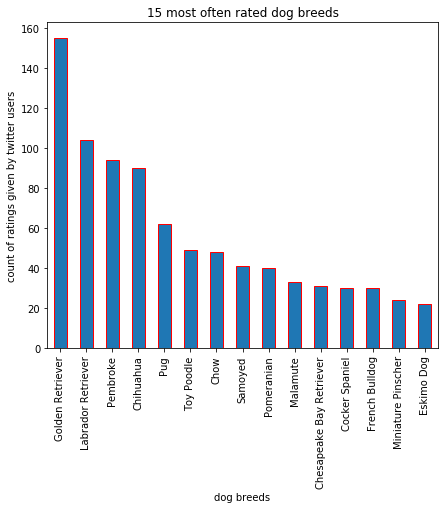

In [87]:
q1 = (master.dog_prediction.value_counts()).head(15)
q1.plot.bar(figsize=(7,6), edgecolor='red')
# saving image for later use in report, how to do it found here, source: https://www.kaitaiblog.com.tw/?p=262
plt.title('15 most often rated dog breeds')
plt.xlabel('dog breeds')
plt.ylabel('count of ratings given by twitter users')
plt.savefig('15 most often rated dog breeds', bbox_inches='tight', dpi=600);

###  Q2a) Which dog breeds have the most likes on average?

In [88]:
q2a = (round((master.groupby(['dog_prediction']).mean()['num_of_likes'].sort_values(ascending=False)).head(15), 0))
q2a

dog_prediction
Bedlington Terrier         23088.0
Saluki                     22286.0
French Bulldog             18800.0
Bouvier Des Flandres       16529.0
Afghan Hound               15847.0
Black-And-Tan Coonhound    15708.0
Flat-Coated Retriever      15535.0
Irish Water Spaniel        15045.0
Leonberg                   13640.0
Whippet                    13568.0
English Springer           13035.0
Standard Poodle            12841.0
Cocker Spaniel             12687.0
Samoyed                    12648.0
Border Terrier             12516.0
Name: num_of_likes, dtype: float64

#### Q2a Visualisation: 15 dog breeds with most likes on average

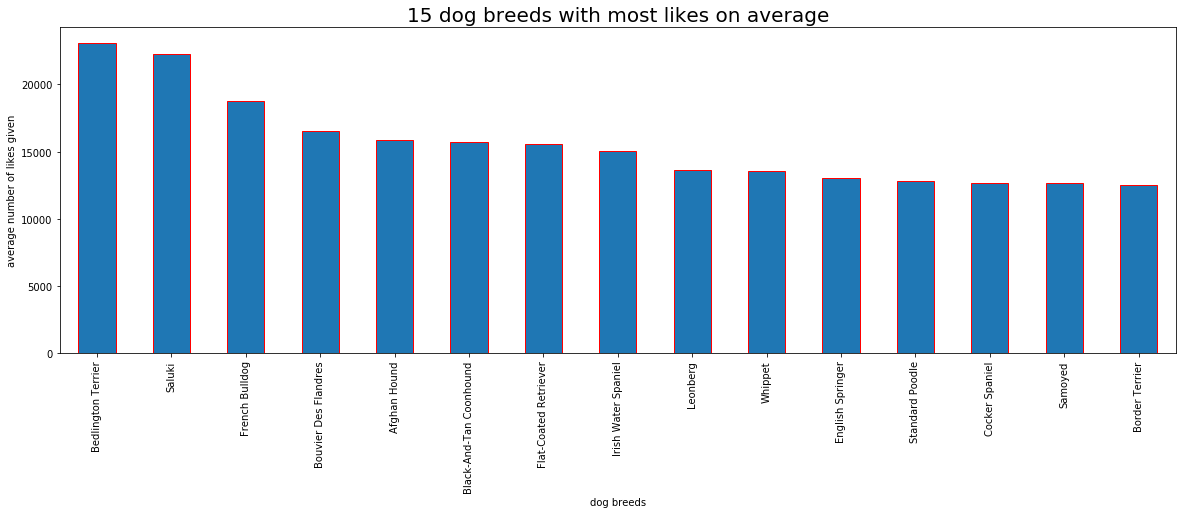

In [89]:
q2a.plot.bar(figsize=(20,6), edgecolor='red')
plt.title('15 dog breeds with most likes on average', fontsize=20)
plt.xlabel('dog breeds')
plt.ylabel('average number of likes given')
plt.savefig("15 dog breeds with most likes on average", bbox_inches='tight', dpi=600);

###  Q2b)  Which dog breeds have the most retweets on average?

In [90]:
q2b = (round((master.groupby(['dog_prediction']).mean()['num_of_retweets'].sort_values(ascending=False)).head(15), 0))
q2b

dog_prediction
Bedlington Terrier       7345.0
Afghan Hound             5240.0
Standard Poodle          4889.0
French Bulldog           4824.0
English Springer         4799.0
Saluki                   4530.0
Whippet                  4512.0
Cocker Spaniel           4353.0
Eskimo Dog               4256.0
Samoyed                  4170.0
Flat-Coated Retriever    4045.0
Irish Water Spaniel      3973.0
Great Pyrenees           3969.0
Bouvier Des Flandres     3924.0
Lakeland Terrier         3834.0
Name: num_of_retweets, dtype: float64

#### Q2b Visualisation: 15 dog breeds with most likes on average

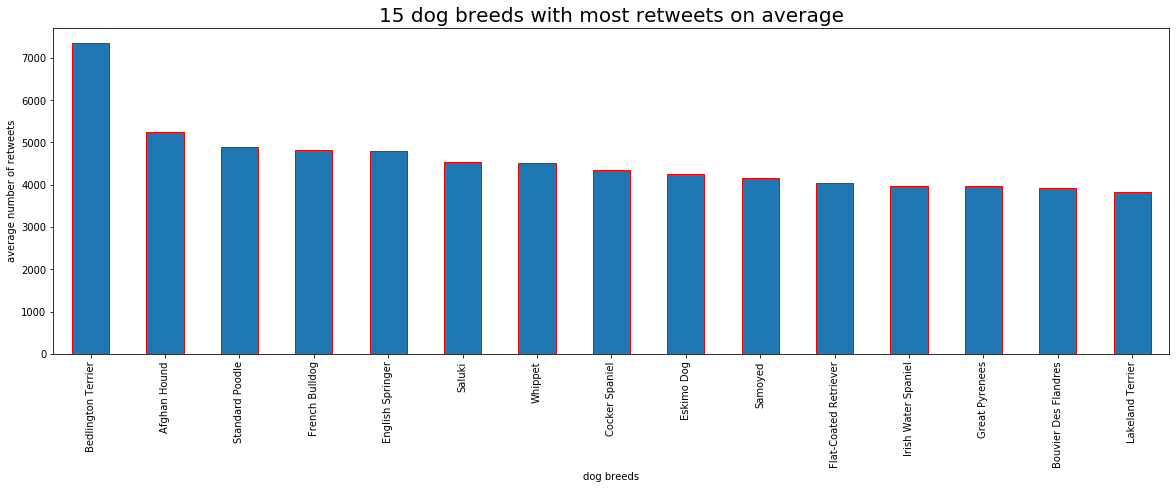

In [91]:
q2b.plot.bar(figsize=(20,6), edgecolor='red')
plt.title('15 dog breeds with most retweets on average', fontsize=20)
plt.xlabel('dog breeds')
plt.ylabel('average number of retweets')
plt.savefig("15 dog breeds with most retweets on average", bbox_inches='tight', dpi=600);

###  Q3)  Which dog breeds have the highest average ratings?

In [92]:
q3= round((master.groupby(['dog_prediction']).mean()['ratings'].sort_values(ascending=False)).head(15), 3)
q3

dog_prediction
Bouvier Des Flandres       1.300
Saluki                     1.250
Briard                     1.233
Tibetan Mastiff            1.225
Border Terrier             1.214
Standard Schnauzer         1.200
Silky Terrier              1.200
Gordon Setter              1.175
Irish Setter               1.175
Samoyed                    1.173
Golden Retriever           1.153
Wire-Haired Fox Terrier    1.150
Australian Terrier         1.150
Great Pyrenees             1.147
Pembroke                   1.143
Name: ratings, dtype: float64

###  Q4)  What are the most popular dog names on WeRateDogs?

In [93]:
master.name.value_counts().head(15)

Charlie    10
Oliver     10
Cooper     10
Tucker      9
Lucy        9
Penny       9
Sadie       8
Winston     8
Lola        7
Daisy       7
Toby        7
Koda        6
Stanley     6
Jax         6
Bo          6
Name: name, dtype: int64

###  Q5)  On which day in a week is the best to post tweet to get the most likes?

In [94]:
# adding new column to extract day of week from timestamp
master['dayofweek'] = master['timestamp'].dt.day_name()

In [95]:
# most likes given by days on average
q5 = round((master.groupby(['dayofweek']).mean()['num_of_likes']).sort_values(ascending=False),0)
q5

dayofweek
Wednesday    9249.0
Saturday     8713.0
Tuesday      8625.0
Friday       8248.0
Sunday       8193.0
Monday       7927.0
Thursday     7549.0
Name: num_of_likes, dtype: float64

###  Q6)  When people usually post tweets on WeRateDogs?

In [96]:
# on which days people usually put tweets on WeRateDogs?
q6 = round((master.groupby(['dayofweek']).count()['tweet_id']).sort_values(ascending=False),0)
q6

dayofweek
Monday       324
Wednesday    291
Tuesday      290
Thursday     276
Friday       276
Sunday       253
Saturday     248
Name: tweet_id, dtype: int64

#### Q5 + Q6 Visualisation: Average number of likes given and tweets posted during week

In [97]:
# I wanted days to be show as they follow during the week
# source:https://technology.amis.nl/2019/10/16/ordering-rows-in-pandas-data-frame-and-bars-in-plotly-bar-chart-by-day-of-the-week-or-any-other-user-defined-order/

# creating ordered list of days
from pandas.api.types import CategoricalDtype
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=days, ordered=True)


q5f = q5.to_frame().reset_index() # changing previous results to dataframe
q6f = q6.to_frame().reset_index()

q6f['dayofweek']=q6f['dayofweek'].astype(cat_type) # adding ordered days

q5_6 = (q6f.groupby(['dayofweek']).mean().reset_index()).merge(q5f) # merging both dataframes with results

# last changes to final table later used for visualisation
q5_6.rename(columns={'tweet_id':'num_of_tweets'}, inplace=True)
q5_6.num_of_likes = q5_6.num_of_likes.astype(int)
q5_6

,dayofweek,num_of_tweets,num_of_likes
0,Monday,324,7927
1,Tuesday,290,8625
2,Wednesday,291,9249
3,Thursday,276,7549
4,Friday,276,8248
5,Saturday,248,8713
6,Sunday,253,8193


In [98]:
# list of values for easy setting height of bars in graph
q5_6_tweets_list = q5_6.num_of_tweets.to_list()
q5_6_likes_list = q5_6.num_of_likes.to_list()
q5_6_tweets_list, q5_6_likes_list

([324, 290, 291, 276, 276, 248, 253],
 [7927, 8625, 9249, 7549, 8248, 8713, 8193])

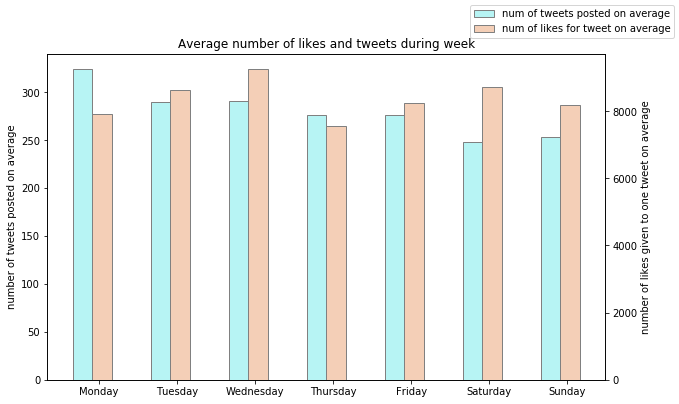

In [99]:
# source: https://python-graph-gallery.com/11-grouped-barplot/, https://knowledge.udacity.com/questions/144928
barWidth = 0.25
 
# set height of bar, copied from previous cell
bars1 = [324, 290, 291, 276, 276, 248, 253]
bars2 = [7928, 8626, 9250, 7550, 8248, 8713, 8193] 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# adding secondary y axis
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(r1, bars1, color='#B7F4F4', width=barWidth, edgecolor='grey', label='num of tweets posted on average')
ax2.bar(r2, bars2, color='#F4CFB7', width=barWidth, edgecolor='grey', label='num of likes for tweet on average') 

# Add xticks on the middle of the group bars

plt.xticks([r + 0.85 * barWidth for r in range(len(bars1))], days)

# Create legend & Show graphic
plt.title("Average number of likes and tweets during week")
ax1.set_ylabel('number of tweets posted on average')
ax2.set_ylabel('number of likes given to one tweet on average')
fig.legend()
plt.savefig("average number of likes and tweets during week", bbox_inches='tight', dpi=600)
plt.show();

###  Q7)  Are number of retweets and number of likes growing over time? (Visualisation)

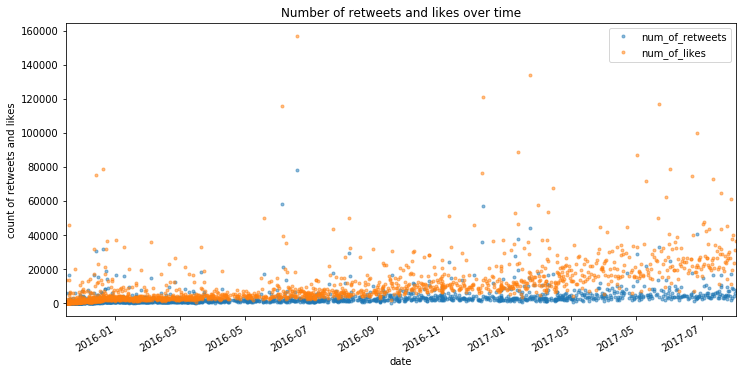

In [100]:
master.plot.line(x='timestamp', y =['num_of_retweets', 'num_of_likes'], alpha = 0.5, style='.', figsize=(12,6))
plt.title('Number of retweets and likes over time')
plt.xlabel('date')
plt.ylabel('count of retweets and likes')
plt.savefig("number_of_retweets_likes_over_time", bbox_inches='tight', dpi=600)
plt.show();

### Q8) Do the tweets with puppies get more likes on average?

In [101]:
# how big are groups with and without puppies?
master.groupby(['puppy_in_tweet']).count()['num_of_likes']

puppy_in_tweet
no puppy    1862
puppy         96
Name: num_of_likes, dtype: int64

In [102]:
q8 = round(master.groupby(['puppy_in_tweet']).mean(), 0)['num_of_likes']
q8

puppy_in_tweet
no puppy    8457.0
puppy       6340.0
Name: num_of_likes, dtype: float64

### Q9) Do the tweets with puppies get better ratings on average?

In [103]:
q9 = round(master.groupby(['puppy_in_tweet']).mean(), 3)['ratings']
q9

puppy_in_tweet
no puppy    1.056
puppy       0.991
Name: ratings, dtype: float64

### Q10) Do the tweets with puppies get more retweets on average?

In [104]:
q10 = round(master.groupby(['puppy_in_tweet']).mean(), 0)['num_of_retweets']
q10

puppy_in_tweet
no puppy    2519.0
puppy       1712.0
Name: num_of_retweets, dtype: float64

#### Q8 + Q10 Visualisation: Popularity of tweets with and without puppies

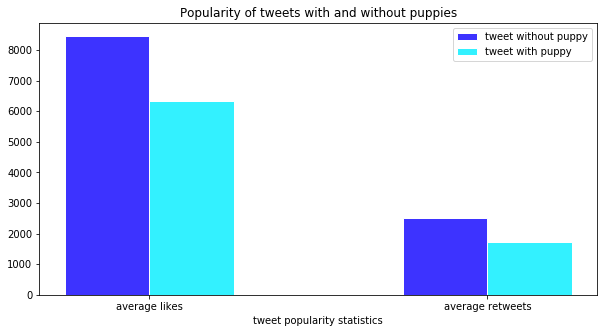

In [105]:
# changing results to numpy arrays for easier use in graph later
q8n = q8.to_numpy()
q10n = q10.to_numpy()


# how to make grouped barplot foud here source https://python-graph-gallery.com/11-grouped-barplot/
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [q8n[0], q10n[0]]
bars2 = [q8n[1], q10n[1]]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10,5))
 
# Make the plot

plt.bar(r1, bars1, color='#3D33FF', width=barWidth, edgecolor='white', label='tweet without puppy')
plt.bar(r2, bars2, color='#33F1FF', width=barWidth, edgecolor='white', label='tweet with puppy')

 
# Add xticks on the middle of the group bars
plt.xlabel('tweet popularity statistics')
plt.xticks([r + 0.5 * barWidth for r in range(len(bars1))], ['average likes', 'average retweets'])
 
# Create legend & Show graphic
plt.legend()
plt.title("Popularity of tweets with and without puppies")
plt.savefig("popularity of tweets with and without puppies", bbox_inches='tight', dpi=600)
plt.show();

### Q11) What do people writting tweets on WeRateDogs, say the most often in their tweets?

In [106]:
# before using wordcloud our text must be in a string
all_string = ','.join(master.text)
# check what we get
all_string

'This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,This is Tilly. She\'s just checking pup on you. Hopes you\'re doing ok. If not, she\'s available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f,Here we have a majestic great white breaching off South Africa\'s coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H ht

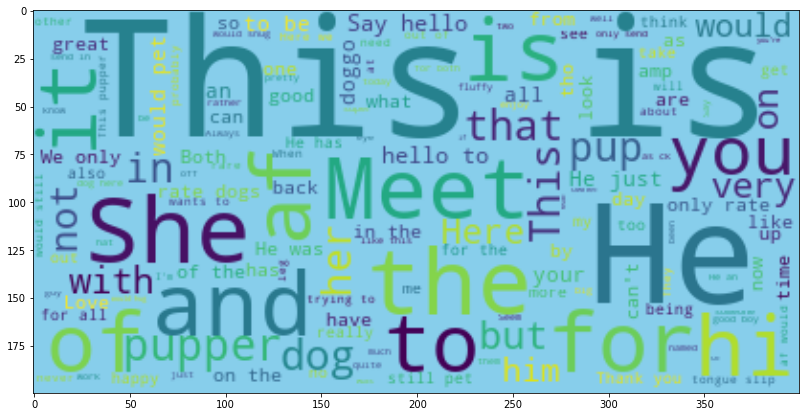

In [107]:
# how to use wordcloud found here: 
# source https://python-graph-gallery.com/261-custom-python-wordcloud/
wordcloud = WordCloud(max_words=150, stopwords=["https", "https co", "co", "ckin"], background_color="skyblue").generate(all_string)
q11_save = plt.figure(figsize=(11,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.savefig("word_id_tweets", bbox_inches='tight', dpi=800)
plt.show();

### Q12) What do tweets with highest number of likes (or retweets) have in common?

In [108]:
#checking 5 tweets with highest number of likes
master.nlargest(5, ['num_of_likes']) 

,tweet_id,timestamp,source,text,expanded_urls,name,puppy_in_tweet,ratings,dog_stage,jpg_url,img_num,dog_prediction,confidence,num_of_retweets,num_of_likes,dayofweek
759,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,NaN,no puppy,1.3,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador Retriever,0.825333,78182,156890,Saturday
302,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,no puppy,1.3,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,0.196015,44041,133618,Saturday
392,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,no puppy,1.3,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,57007,121186,Friday
107,866450705531457537,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",Jamesy,no puppy,1.3,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French Bulldog,0.905334,33094,116842,Monday
794,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,NaN,no puppy,1.3,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Eskimo Dog,0.503372,57939,115873,Saturday


In [109]:
#checking 5 tweets with highest number of retweets
master.nlargest(5, ['num_of_retweets']) 

,tweet_id,timestamp,source,text,expanded_urls,name,puppy_in_tweet,ratings,dog_stage,jpg_url,img_num,dog_prediction,confidence,num_of_retweets,num_of_likes,dayofweek
759,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,NaN,no puppy,1.3,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador Retriever,0.825333,78182,156890,Saturday
794,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,NaN,no puppy,1.3,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Eskimo Dog,0.503372,57939,115873,Saturday
392,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,no puppy,1.3,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,57007,121186,Friday
302,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,no puppy,1.3,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,0.196015,44041,133618,Saturday
58,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,Duddles,no puppy,1.3,NaN,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,English Springer,0.383404,40752,99631,Monday


I noticed that 3 of 5 most liked tweets contains video and 4 of 5 most retweeted tweets have also contains video.

In [110]:
# Therefore I wanted to see if tweets with videos are popular in whole dataset, so I created additional column photo_or_video
master['photo_or_video'] = master.expanded_urls.str[-7:-2]

In [111]:
# check how big are groups of photo or video tweets
master.groupby(['photo_or_video']).count()['tweet_id']

photo_or_video
photo    1886
video      72
Name: tweet_id, dtype: int64

In [112]:
# Average number of likes for photo or video tweets
q12a = round(master.groupby(['photo_or_video']).mean(), 0)['num_of_likes']
q12a

photo_or_video
photo     7864.0
video    21165.0
Name: num_of_likes, dtype: float64

In [113]:
# Median number of likes for photo or video tweets
round(master.groupby(['photo_or_video']).median(), 0)['num_of_likes']

photo_or_video
photo    3650.0
video    8890.0
Name: num_of_likes, dtype: float64

In [114]:
# Average number of retweets for photo or video tweets
q12b = round(master.groupby(['photo_or_video']).mean(), 0)['num_of_retweets']
q12b

photo_or_video
photo    2237.0
video    8827.0
Name: num_of_retweets, dtype: float64

In [115]:
# Median number of likes for photo or video tweets
round(master.groupby(['photo_or_video']).median(), 0)['num_of_retweets']

photo_or_video
photo    1164.0
video    3041.0
Name: num_of_retweets, dtype: float64

In [116]:
round(master.groupby(['photo_or_video']).mean(), 3)['ratings']

photo_or_video
photo    1.047
video    1.192
Name: ratings, dtype: float64

#### Q12 Visualisation: Popularity of tweets with photos and videos

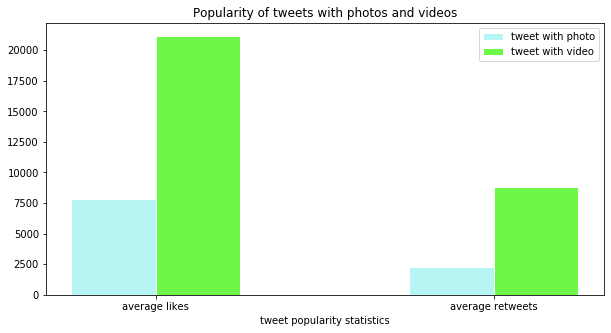

In [117]:
# changing results to numpy arrays for easier use in graph later
q12an = q12a.to_numpy()
q12bn = q12b.to_numpy()


# how to make grouped barplot foud here source https://python-graph-gallery.com/11-grouped-barplot/
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [q12an[0], q12bn[0]]
bars2 = [q12an[1], q12bn[1]]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10,5))
 
# Make the plot

plt.bar(r1, bars1, color='#B7F4F4', width=barWidth, edgecolor='white', label='tweet with photo')
plt.bar(r2, bars2, color='#6DF747', width=barWidth, edgecolor='white', label='tweet with video')

 
# Add xticks on the middle of the group bars
plt.xlabel('tweet popularity statistics')
plt.xticks([r + 0.5 * barWidth for r in range(len(bars1))], ['average likes', 'average retweets'])
 
# Create legend & Show graphic
plt.legend()
plt.title("Popularity of tweets with photos and videos")
plt.savefig("popularity of tweets with photos and videos", bbox_inches='tight', dpi=600)
plt.show();